In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd

import warnings

In [3]:
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./TP1_Parte1_Mirko.ipynb
./parte1.ipynb
./Parte2.ipynb
./.ipynb_checkpoints/TP1_Parte1_Mirko-checkpoint.ipynb
./.ipynb_checkpoints/Parte2-checkpoint.ipynb
./.ipynb_checkpoints/Parte2Jonathan-checkpoint.ipynb
./.ipynb_checkpoints/parte1-checkpoint.ipynb


In [4]:
df = pd.read_csv('../data/police_killings.csv', encoding = "ISO-8859-1")
df

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


Nombres y tipos de las columnas

In [5]:
df.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

Descripción de cada una de las columnas:
- name: Nombre del fallecido
- age: Edad del fallecido
- gender: Género del fallecido
- raceethnicity: Raza o etnia del fallecido
- month: Mes del asesinato
- day: Día del incidente
- year: Año del incidente
- streetadress: Calle de dirección de donde ocurrio el incidente
- city: Ciudad donde ocurrio el incidente
- state: Estado de EE.UU. donde ocurrio el incidente
- latitude: Latitud, geocodificación
- longitude: Longitud, geocodificación
- state_fp: Código FIPS de identificación de los estados de EE.UU.
- county_fp: Código FIPS de identificación de los condados de EE.UU.
- tract_ce: Código de identificación del distrito censal de Estados Unidos
- geo_id: Identificación geográfica
- county_id: Identificación de condado
- namelsad: Descripción del distrito censal
- lawenforcementagency: Agencia involucrada en el incidente
- cause: Causa de la muerte
- armed: Si el/la fallecido/da estaba armado/a y con que
- pop: Cantidad de población del distrito censada
- share_white: Porcentaje de población blanca no hispano/a
- share_black: Porcentaje de población negra
- share_hipanic: Porcentaje de población hipano/latino
- p_income: Promedio de ingreso por persona por distrito
- h_income: Promedio de ingreso por familia por distrito
- county_income: Pormedio de ingreso por familia por condado
- comp_income: h_income/county_income, promedio entre h_income y county_income
- county_bucket: Ingreso familiar, quintil dentro del condado
- nat_bucket: Ingreso familiar, qintil nacional
- pov: Tasa de pobreza a nivel distrito
- urate: Tasa de desempleo a nivel distrito
- college: Porcentaje de población de 25 año o mayor con titulo de licenciado o superior

Primero debemos realizar una limpieza del set de datos, por lo que comenzaremos viendo la cantidad de valores nulos por feature.

In [6]:
df.isna().sum()

name                     0
age                      0
gender                   0
raceethnicity            0
month                    0
day                      0
year                     0
streetaddress            4
city                     0
state                    0
latitude                 0
longitude                0
state_fp                 0
county_fp                0
tract_ce                 0
geo_id                   0
county_id                0
namelsad                 0
lawenforcementagency     0
cause                    0
armed                    0
pop                      0
share_white              0
share_black              0
share_hispanic           0
p_income                 0
h_income                 2
county_income            0
comp_income              2
county_bucket           27
nat_bucket               2
pov                      0
urate                    2
college                  2
dtype: int64

In [7]:
police_killings = df.copy()

Eliminamos los valores nulos

A continuación vemos los primeros y últimos valores del dataframe:

In [15]:
police_killings

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


In [9]:
police_killings.dropna(inplace=True)

- Variables cualitativas:
    - gender
    - race ethnicity
    - street address
    - city
    - state
    - state_fp
    - county_fp
    - law enforcement agency
    - cause
    - armed
    
- Variables cualitativas despreciables
    - street address
    - namelsad

- Variables cuantitativas:
    - day
    - ***month***
    - latitude/longitude
    - state_fp 
    - counte_fp 
    - tract_ce 
    - geo_id
    - county_id
    - share_white 
    - share_black 
    - share_hispanic 
    - p_income
    - h_income
    - nat_bucket 
    - pov
    - urate 
    - college
    - county_income,
    - comp_income
    - county_bucket
    - ***pop***
   
- Variables cualitativas despreciables
    - year (pues todos los asesinatos del df ocurren en 2015)

In [14]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
name,A'donte Washington,Aaron Rutledge,Aaron Siler,Aaron Valdez,Adam Jovicic,Adam Reinhart,Adrian Hernandez,Adrian Solis,Alan Alverson,Alan James,...,Walter Scott,Wendell King,Wilber Castillo-Gongora,William 'Rusty' Smith,William Campbell,William Chapman II,William Dick III,William Poole,Yuvette Henderson,Zaki Shinwary
age,16,27,26,25,29,29,22,35,44,31,...,50,40,35,53,59,18,28,52,38,48
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male
raceethnicity,Black,White,White,Hispanic/Latino,White,White,Hispanic/Latino,Hispanic/Latino,White,White,...,Black,White,Hispanic/Latino,White,Unknown,Black,Native American,White,Black,Unknown
month,February,April,March,March,March,March,March,March,January,February,...,April,January,February,March,January,April,April,March,February,January
day,23,2,14,11,19,7,27,26,28,7,...,4,29,5,10,25,22,4,16,3,16
year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
streetaddress,Clearview Ln,300 block Iris Park Dr,22nd Ave and 56th St,3000 Seminole Ave,364 Hiwood Ave,18th St and Palm Ln,4000 Union Ave,1500 Bayview Ave,Pickett Runn Rd,200 Abbie St SE,...,1945 Remount Rd,4800 Hildring Dr E,US-287,700 Valley St,335 New Brooklyn Rd,1098 Frederick Blvd,Bureau of Indian Affairs Rd 66,130 Wedowee Ln,3800 Hollis St,Lake Arrowhead Ave and Great Salt Lake Dr
city,Millbrook,Pineville,Kenosha,South Gate,Munroe Falls,Phoenix,Bakersfield,Wilmington,Sunset,Wyoming,...,North Charleston,Forth Worth,Electra,Hoover,Berlin,Portsmouth,Tonasket,Gaston,Oakland,Fremont
state,AL,LA,WI,CA,OH,AZ,CA,CA,TX,MI,...,SC,TX,TX,AL,NJ,VA,WA,NC,CA,CA


# Prueba gráfico geográfico

In [32]:
coords = police_killings[["latitude", "longitude"]]
coords = coords.loc[coords["longitude"] > -140]
coords

,latitude,longitude
0,32.529577,-86.362829
1,31.321739,-92.434860
2,42.583560,-87.835710
3,33.939298,-118.219463
4,41.148575,-81.429878
...,...,...
462,36.829014,-76.341438
463,48.708542,-119.436829
464,35.205776,-81.240669
465,37.827129,-122.284492


/tmp/ipykernel_7310/3022779716.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


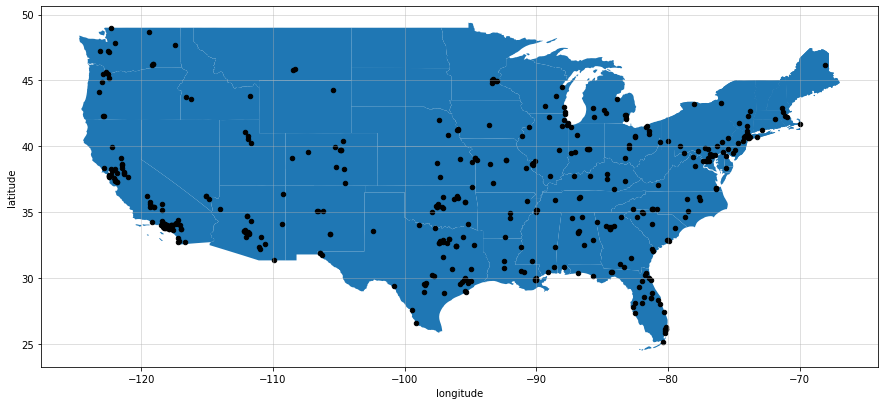

In [42]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,20))
# plot map on axis
usa.plot(ax=ax)

# plot points
coords.plot(ax=ax, x="longitude", y="latitude", kind="scatter", color="000000")
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

In [170]:
columnas_cualitativas = ["gender", 
                         "raceethnicity", 
                         "month", 
                         "city", 
                         "state", 
                         "state_fp", 
                         "county_fp", 
                         "lawenforcementagency", 
                         "cause", 
                         "armed"] 

In [171]:
df_cualitativas = police_killings[columnas_cualitativas]
df_cualitativas.T

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male
raceethnicity,Black,White,White,Hispanic/Latino,White,White,Hispanic/Latino,Hispanic/Latino,White,White,...,Black,White,Hispanic/Latino,White,Unknown,Black,Native American,White,Black,Unknown
month,February,April,March,March,March,March,March,March,January,February,...,April,January,February,March,January,April,April,March,February,January
city,Millbrook,Pineville,Kenosha,South Gate,Munroe Falls,Phoenix,Bakersfield,Wilmington,Sunset,Wyoming,...,North Charleston,Forth Worth,Electra,Hoover,Berlin,Portsmouth,Tonasket,Gaston,Oakland,Fremont
state,AL,LA,WI,CA,OH,AZ,CA,CA,TX,MI,...,SC,TX,TX,AL,NJ,VA,WA,NC,CA,CA
state_fp,1,22,55,6,39,4,6,6,48,26,...,45,48,48,1,34,51,53,37,6,6
county_fp,51,79,59,37,153,13,29,37,41,81,...,19,439,485,73,7,740,47,71,1,1
lawenforcementagency,Millbrook Police Department,Rapides Parish Sheriff's Office,Kenosha Police Department,South Gate Police Department,Kent Police Department,Phoenix Police Department,Bakersfield Police Department,Los Angeles Police Department,Wise County Sheriff's Department and Texas DPS,Kentwood Police Department and Wyoming DPS,...,North Charleston Police Department,Fort Worth Police Department,Wichita County Sheriff's Office,Hoover Police Department,Winslow Police Department,Portsmouth Police Department,US Forest Service,Gaston County Police Department,Emeryville Police Department,Fremont Police Department
cause,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,...,Gunshot,Gunshot,Taser,Gunshot,Gunshot,Gunshot,Taser,Gunshot,Gunshot,Gunshot
armed,No,No,No,Firearm,No,No,Firearm,Non-lethal firearm,Firearm,Other,...,Knife,Unknown,Unknown,No,Non-lethal firearm,No,Firearm,Firearm,Firearm,Firearm


In [172]:
df_cualitativas.count()

gender                  436
raceethnicity           436
month                   436
city                    436
state                   436
state_fp                436
county_fp               436
lawenforcementagency    436
cause                   436
armed                   436
dtype: int64

Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de filas correspondientes a cada uno.

In [173]:
genderSize = df_cualitativas.groupby(['gender']).size()
df_genderSize = genderSize.to_frame(name='cantidad')
df_genderSize

,cantidad
gender,
Female,22
Male,414


Este proceso, de creacion de dataframes lo vamos a repetir en un loop para cada feature cualitativo y luego los mergearemos en un único dataframe.

In [174]:
feature_size_df_list = []
for col in columnas_cualitativas:
    feature_size_df_list.append(df_cualitativas.groupby([col]).size().to_frame(name='cantidad'))
df_merged = pd.concat(feature_size_df_list, keys=columnas_cualitativas)
df_merged

cantidad
gender        Female                        22
              Male                         414
raceethnicity Asian/Pacific Islander        10
              Black                        127
              Hispanic/Latino               65
...                                        ...
armed         No                            93
              Non-lethal firearm            11
              Other                         24
              Unknown                        7
              Vehicle                       18

[914 rows x 1 columns]

Representación de las variables en gráficos de barra

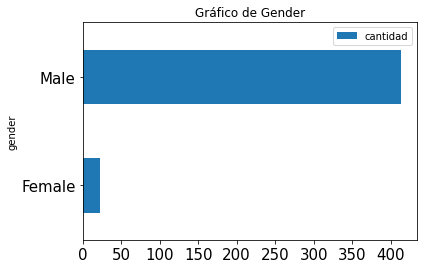

In [175]:
genderSize = df_cualitativas.groupby(['gender']).size();
df_genderSize = genderSize.to_frame(name='cantidad');
df_genderSize.plot(kind='barh', width=0.5, fontsize=15, title="Gráfico de Gender");

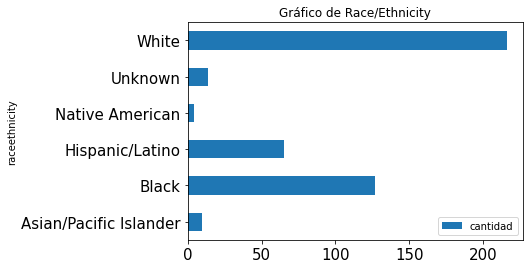

In [176]:
raceethnicitySize = df_cualitativas.groupby(['raceethnicity']).size();
df_raceethnicity = raceethnicitySize.to_frame(name='cantidad');
df_raceethnicity.plot(kind='barh', width=0.5, fontsize=15, title="Gráfico de Race/Ethnicity");

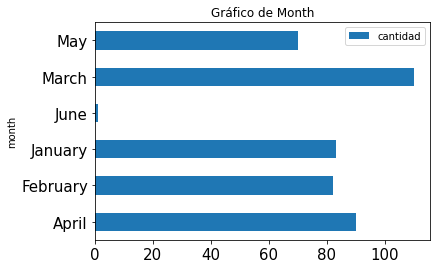

In [177]:
monthSize = df_cualitativas.groupby(['month']).size();
df_month = monthSize.to_frame(name='cantidad');
df_month.plot(kind='barh', width=0.5, fontsize=15, title="Gráfico de Month");

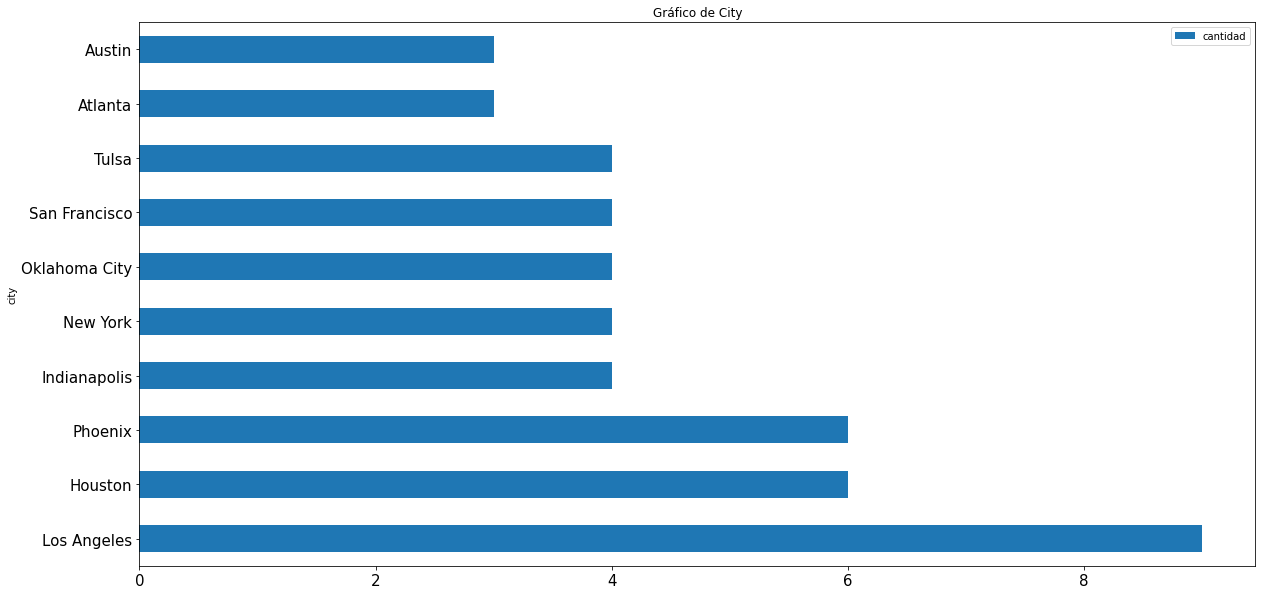

In [178]:
citySize = df_cualitativas.groupby(['city']).size();
df_city = citySize.to_frame(name='cantidad');
df_city.nlargest(10,"cantidad").plot(kind='barh', width=0.5, figsize=(20,10), fontsize=15, title="Gráfico de City");

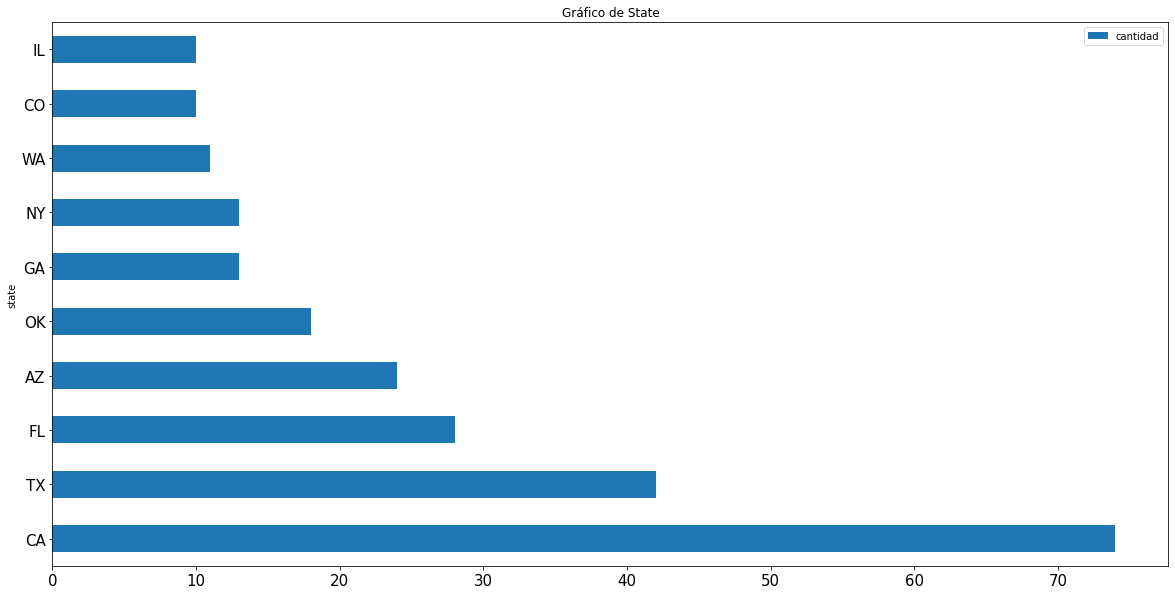

In [179]:
stateSize = df_cualitativas.groupby(['state']).size();
df_state = stateSize.to_frame(name='cantidad');
df_state.nlargest(10,"cantidad").plot(kind='barh', width=0.5, figsize=(20,10), fontsize=15, title="Gráfico de State");

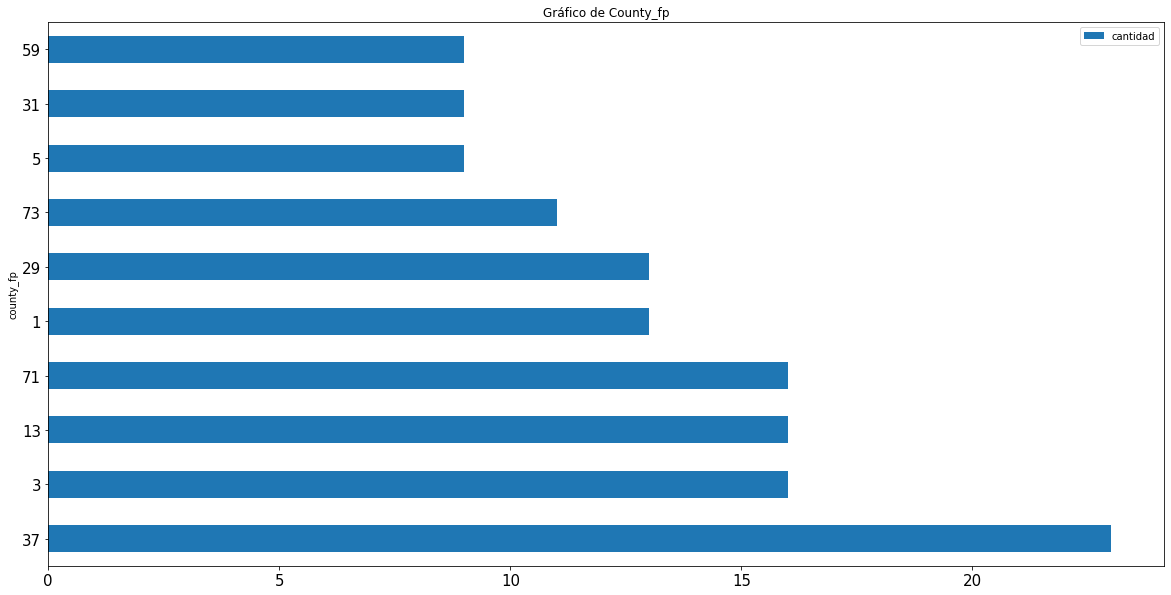

In [185]:
county_fpSize = df_cualitativas.groupby(['county_fp']).size();
df_county_fp = county_fpSize.to_frame(name='cantidad');
df_county_fp.nlargest(10,"cantidad").plot(kind='barh', width=0.5, figsize=(20,10), fontsize=15, title="Gráfico de County_fp");

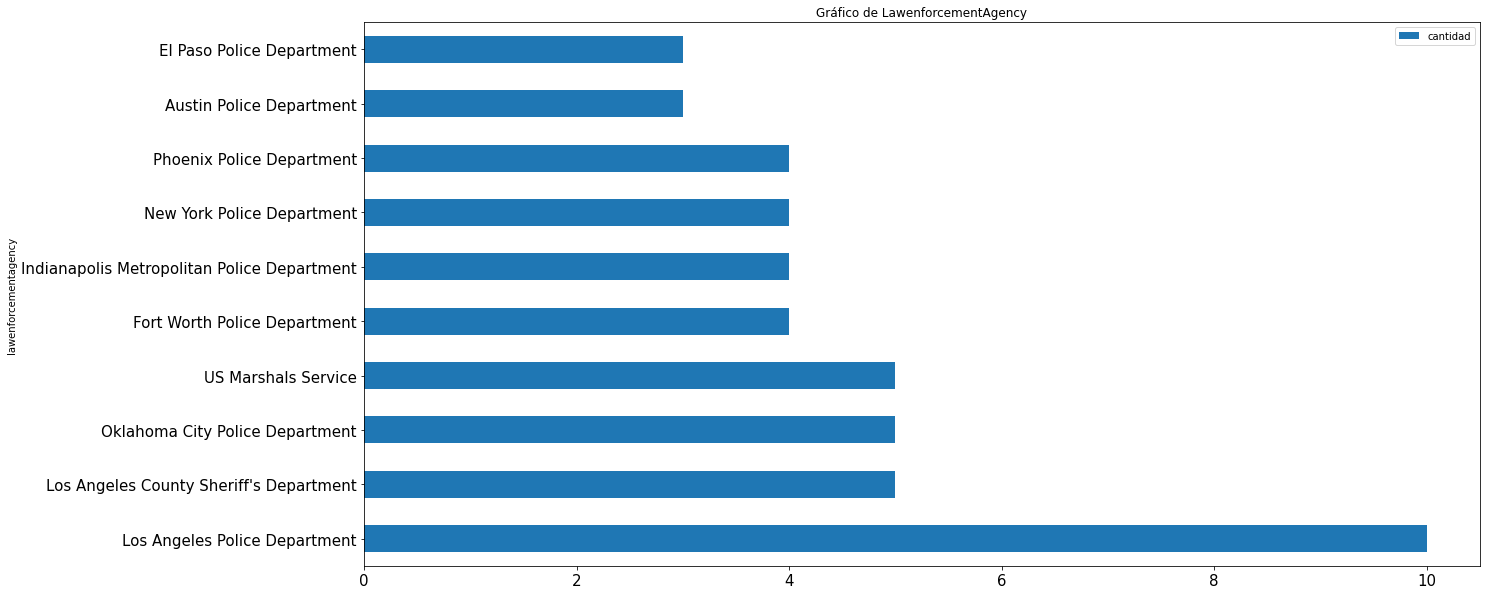

In [181]:
lawenforcementagencySize = df_cualitativas.groupby(['lawenforcementagency']).size();
df_lawenforcementagency = lawenforcementagencySize.to_frame(name='cantidad');
df_lawenforcementagency.nlargest(10,"cantidad").plot(kind='barh', width=0.5, figsize=(20,10), fontsize=15, title="Gráfico de LawenforcementAgency");

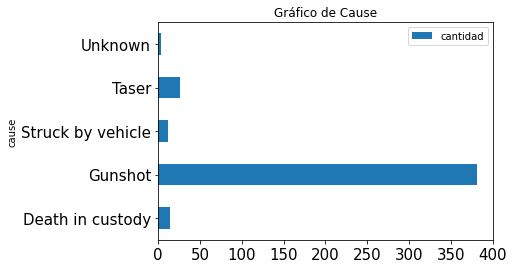

In [182]:
causeSize = df_cualitativas.groupby(['cause']).size();
df_cause = causeSize.to_frame(name='cantidad');
df_cause.plot(kind='barh', width=0.5, fontsize=15, title="Gráfico de Cause");

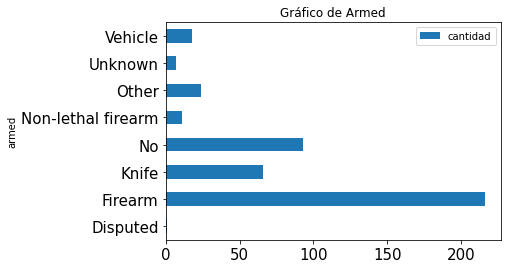

In [183]:
armedSize = df_cualitativas.groupby(['armed']).size();
df_armed = armedSize.to_frame(name='cantidad');
df_armed.plot(kind='barh', width=0.5, fontsize=15, title="Gráfico de Armed");

¿Es posible realizar este gráfico con un histograma? Explique las diferencias entre estos dos tipos de gráficos.

No es posible representar las variables en un gráfico de histograma porque se está trabajando con variables 
cualitativas. Ya que el gráfico de histograma muestra la frecuencia de datos numéricos, cada columna representa 
un grupo definido por una variable cuantitativa, a diferencia del gráfico de barra, cada columna representa a un 
grupo definido por una variable categórica y se usa justamente para comparar diferentes categorías de datos.